In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("farm_production_dataset.csv")

In [74]:
df

,ref_date,geo,crop_type,avg_farm_price,avg_yield,production,seeded_area_acres,seeded_area_hectares,total_farm_value
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208
...,...,...,...,...,...,...,...,...,...
10268,1984,SK,Tame hay,78.00,2870.0,2087000.0,1800000.0,728000.0,162786
10269,1984,SK,"Wheat, all",176.00,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.00,1200.0,1633000.0,3350000.0,1356000.0,307004
10271,1984,SK,"Wheat, spring",175.00,1460.0,9607000.0,16300000.0,6596000.0,1681225


In [104]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [113]:
X = df[['total_farm_value','avg_farm_price', 'avg_yield', 'production']]
Y = df['ref_date']

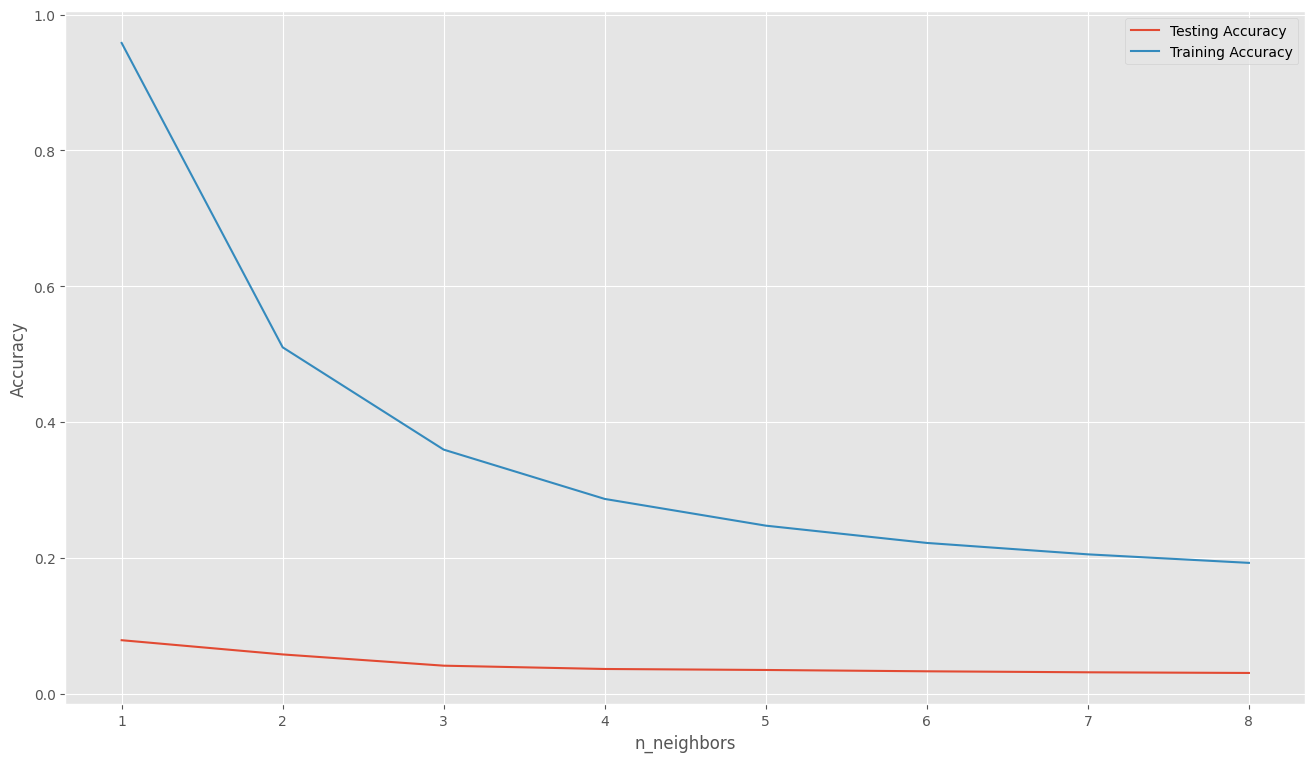

In [125]:
X_train, X_test, Y_train, y_test = train_test_split(
             X, Y, test_size = 0.2, random_state=42)

vecinos = np.arange(1, 9)
train = np.empty(len(vecinos))
test = np.empty(len(vecinos))

for i, k in enumerate(vecinos):
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(X_train, Y_train)
  train[i] = KNN.score(X_train, Y_train)
  test[i] = KNN.score(X_test, y_test)

plt.plot(vecinos, test, label = 'Testing Accuracy')
plt.plot(vecinos, train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()